<a href="https://colab.research.google.com/github/minjeong-kim-git/GNUVILL_AI/blob/main/GNUVILL_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EC%8A%A4%ED%84%B0%EB%94%94(%EC%A4%91%EA%B8%89)_8%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GNUVILL 인공지능 스터디(중급) 8주차 실습: Tensorflow 기본 실습
옷 이미지 분류하기

##1. Tensorflow(텐서플로우)란?

 머신러닝의 마지막 단계에 다다른 만큼 앞으로 딥러닝 공부에 필요한 Tensorflow를 공부하려고 합니다!
*   **Tensorflow**:구글에서 만든 딥러닝 프로그램을 쉽게 구현할 수 있도록 기능을 제공하는 라이브러리(https://www.tensorflow.org/)
*   **keras**:파이썬으로 작성된 고수준 신경망 API (https://keras.io/ko/)

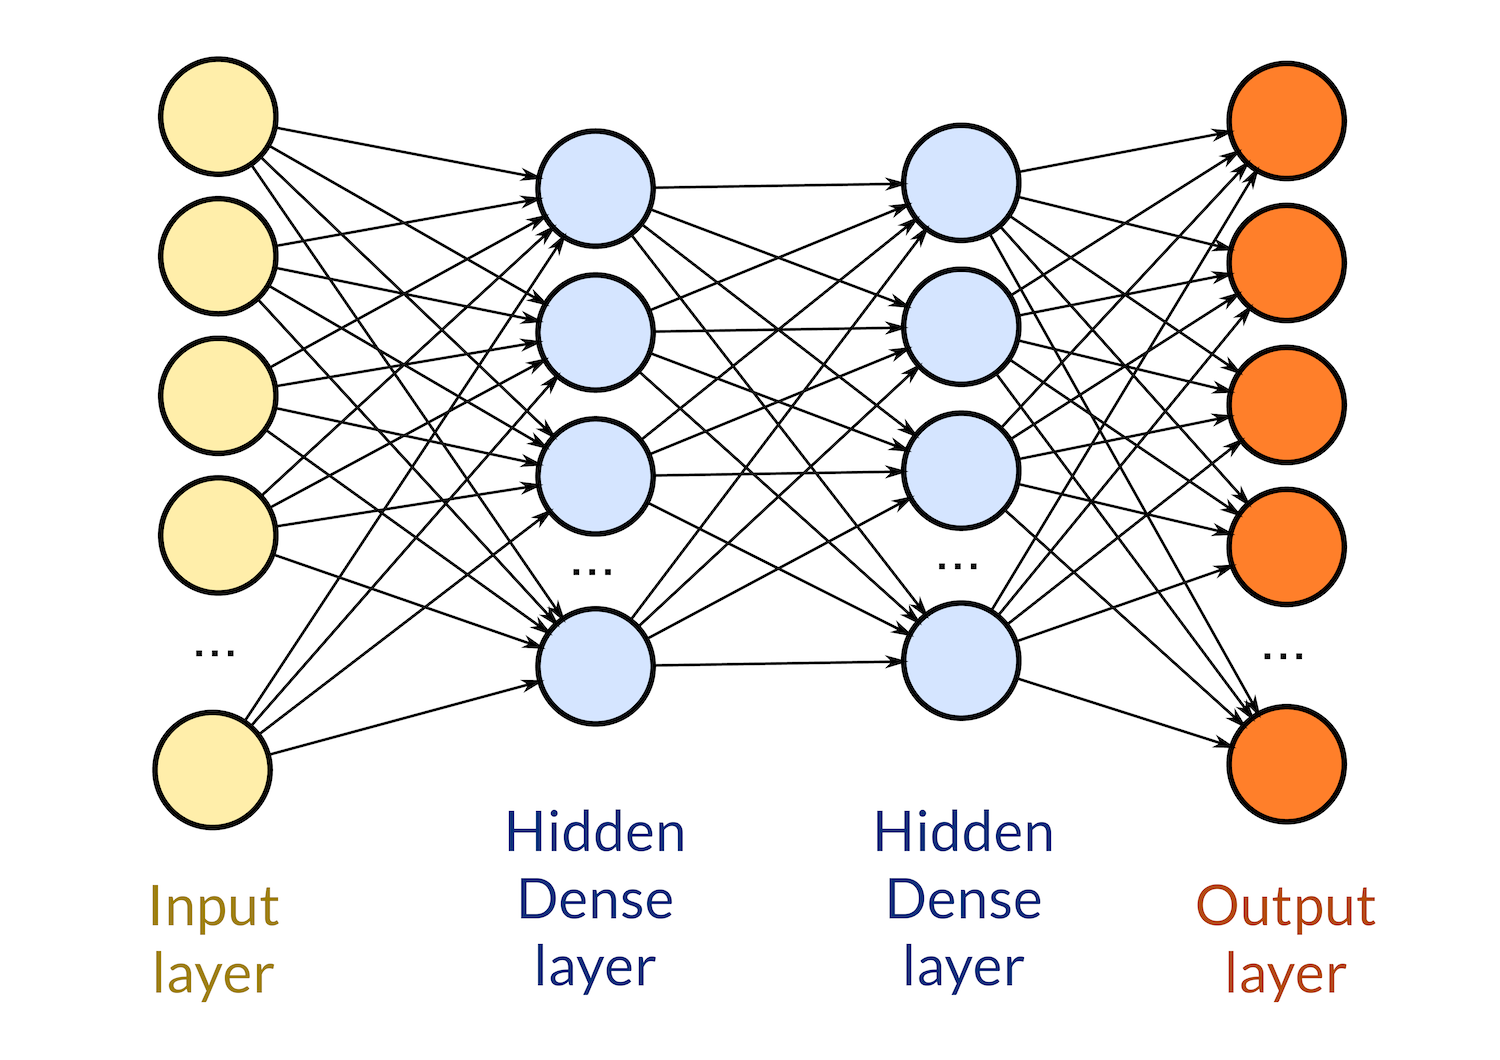

In [ ]:
# tensorflow와 tf.keras import
import tensorflow as tf
from tensorflow import keras

# 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


## 2. 데이터 읽어오기

https://github.com/zalandoresearch/fashion-mnist

MNIST 데이터셋은 손글씨 숫자(0, 1, 2 등)의 이미지로 이루어져 있음.

MNIST 패션은 여기서 사용하려는 옷 이미지와 동일한 포맷의 이미지들

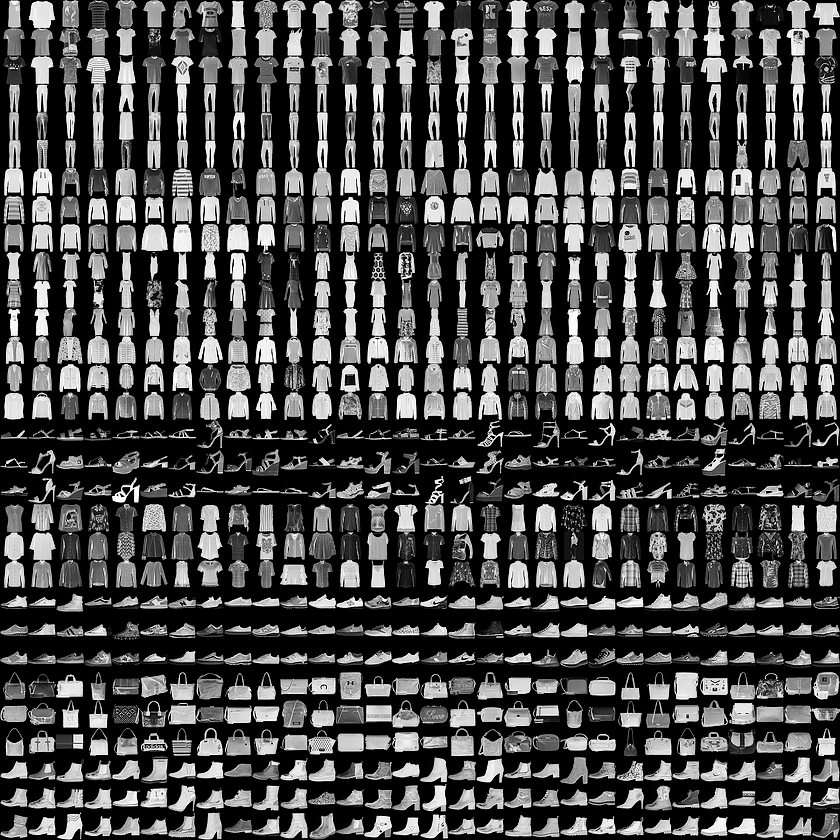

*   train_images, train_labels: 모델 학습에 사용되는 훈련 세트
*   test_images, test_labels: 모델 테스트에 사용되는 테스트 세트

이미지는 28x28 크기의 numpy 배열이고 픽셀 값은 0과 255 사이입니다. 레이블(label)은 0에서 9까지의 정수 배열로, 이 값은 이미지에 있는 옷의 클래스(class)를 나타냅니다.

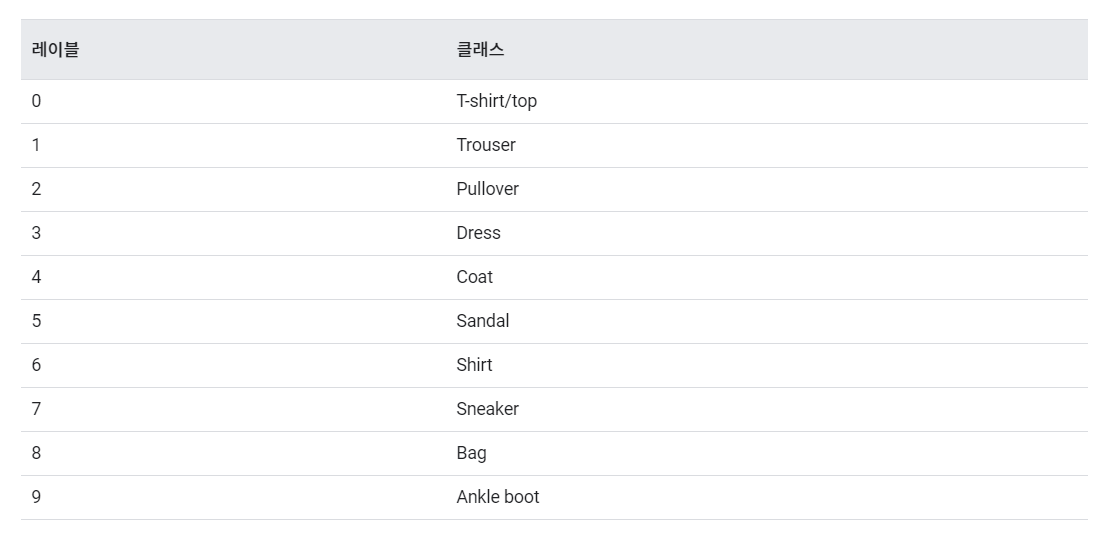



In [ ]:
# fashion mnist 데이터 로드

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 3. 데이터 탐색


## 4. 데이터 전처리
*   **pyplot.imshow()**: 이미지를 표시
*   **pyplot.colorbar()**: 컬러 바 표시
*   **pyplot.grid()**: 그래프에 격자 표시





In [ ]:
# 컬러바로 픽셀 보기

신경망 모델에 주입하기 전에 값의 범위를 0~1 사이로 조정해야 하는데요.

255로 나누어야 합니다. 훈련 세트와 테스트 세트를 동일한 방식으로 전처리해야 합니다.

In [ ]:
# 훈련 세트와 테스트 세트 범위 0~1 사이로 조정하기



*   **pyplot.xticks([])**: x축에 눈금 표시
*   **pyplot.yticks([])**: y축에 눈금 표시
* **cmap=plt.cm.binary**:흑백으로 이미지 표시



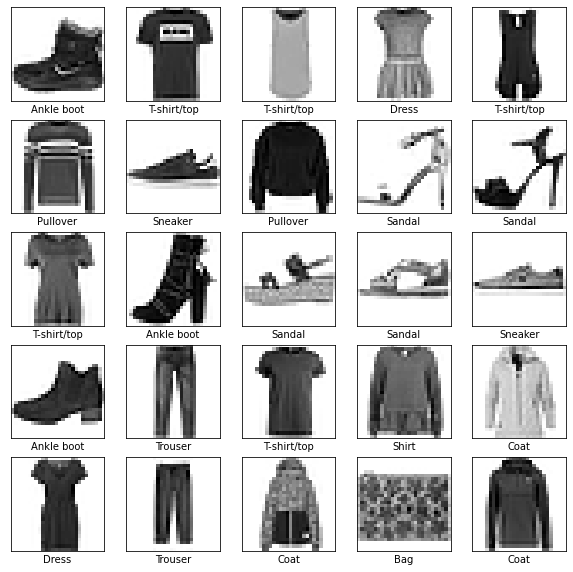

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 5. 모델 구성
신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일합니다.

### 1) 층 설정
신경망의 기본 구성 요소는 층(layer)입니다. 층은 주입된 데이터에서 표현을 추출합니다. 아마도 문제를 해결하는데 더 의미있는 표현이 추출될 것입니다.

활성화 함수의 종류 알아보기: https://yeomko.tistory.com/39
*   **keras.Sequential**: 순차적으로 레이어 층을 더해주며 model을 만드는 keras의 메서드
*   **keras.layers.Flatten**: 입력값을 평평하게 해 batch의 크기에 영향을 받지 않도록 함. 

*   **keras.layers.Dense**: 보통의 밀집 연결 신경망 레이어.
*   **activation='함수명'**: 사용할 활성화 함수 선언




In [ ]:
# model 만들기




### 2) 모델 컴파일

모델을 훈련하기 전에 필요한 몇 가지 설정이 모델 컴파일 단계에서 추가됩니다.



1.   **손실 함수(Loss function)**: 훈련 하는 동안 모델의 오차를 측정하며,모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 합니다.
*   **sparse_categorical_crossentropy**: 다중 분류 손실함수
2.   **옵티마이저(Optimizer)**: 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정합니다.
3.   **지표(Metrics)**: 훈련 단계와 테스트 단계를 모니터링하기 위해 사용합니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.

In [ ]:
# model 컴파일하기

##6. 모델 훈련

1.   훈련 데이터를 모델에 주입합니다
2.   모델이 이미지와 레이블을 매핑하는 방법을 학습
3.   테스트 세트에 대한 모델의 예측을 만듦.

In [ ]:
# model fit 시키기

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6183 - accuracy: 0.7828
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3848 - accuracy: 0.8625
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3400 - accuracy: 0.8756
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3165 - accuracy: 0.8847
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2926 - accuracy: 0.8894


## 7. 정확도 평가

*   **model.evaluate**: 모델을 평가하는 함수
*   **vervose**: 상세한 로깅을 출력할지 말지를 조정하는 파라미터




In [ ]:
# 모델 평가하기

313/313 - 0s - loss: 0.3446 - accuracy: 0.8742

테스트 정확도: 0.8741999864578247


## 8. 예측 만들기

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

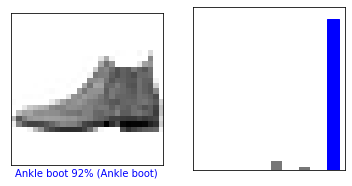

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

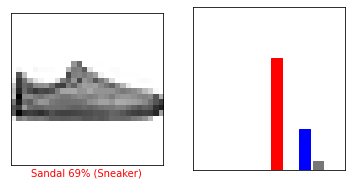

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

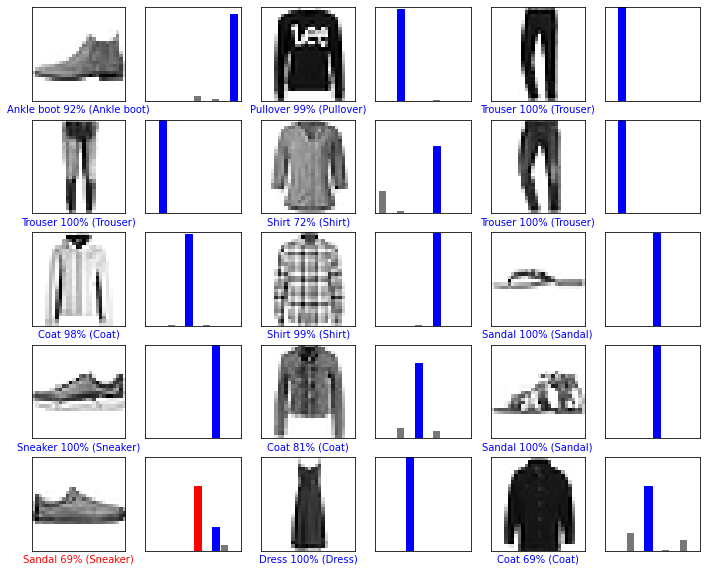

In [ ]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
img = test_images[0]

print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.2715549e-07 2.2690873e-08 1.3983110e-06 2.5901439e-08 7.1395044e-07
  5.4549057e-02 5.0092848e-07 2.0608693e-02 1.8727544e-05 9.2482066e-01]]


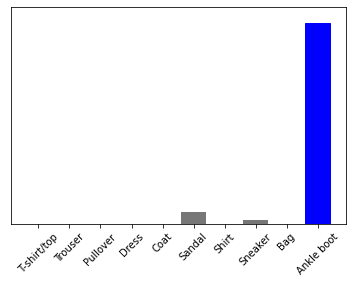

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

9